<a href="https://colab.research.google.com/gist/22961-Deep-learning/c364590c1ead86f6ed78e765b3eea6a6/22961_2_1_3_single_neuron_training_pytorch_with_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import sklearn.datasets as skds
import matplotlib.pyplot as plt

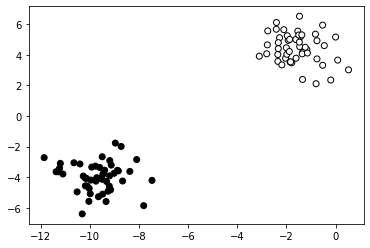

In [28]:
X, Y = skds.make_blobs(n_samples=100,n_features=2,
                       centers=2,random_state=1)
X=torch.tensor(X).float()
Y=torch.tensor(Y).float()
plt.scatter(X[:, 0], X[:, 1],
              c=Y, cmap="Greys", edgecolor="black");

In [29]:
from torch import nn
z=nn.Linear(2,1)
y=nn.Sigmoid()
print(z)

Linear(in_features=2, out_features=1, bias=True)


In [30]:
print(X[0,:])
print(z(X[0,:]))
print(y(z(X[0,:])))

tensor([-0.7942,  2.1050])
tensor([0.0371], grad_fn=<AddBackward0>)
tensor([0.5093], grad_fn=<SigmoidBackward0>)


In [31]:
print(z.weight,z.bias,sep='\n')
assert(z.weight[0,0]*X[0,0]+z.weight[0,1]*X[0,1]+z.bias[0] == z(X[0,:]))

Parameter containing:
tensor([[-0.4650, -0.0226]], requires_grad=True)
Parameter containing:
tensor([-0.2846], requires_grad=True)


In [32]:
def draw_05_line(w0,w1,b):
  line=lambda x:-w0.detach()/w1.detach()*x-b.detach()/w1.detach()
  x0=torch.tensor([-11,0])
  x1=line(x0)

  plt.plot(x0,x1);
  plt.scatter(X[:, 0], X[:, 1],
              c=Y, cmap="Greys", edgecolor="black");

Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)
Parameter containing:
tensor([5.5000], requires_grad=True)


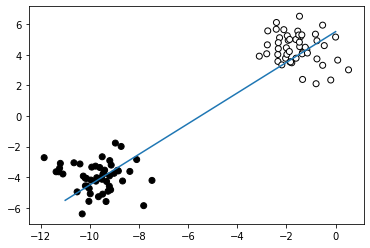

In [33]:
with torch.no_grad():
  z.weight[0,0], z.weight[0,1], z.bias[0] = (1, -1, 5.5)
print(z.weight,z.bias,sep='\n')
draw_05_line(z.weight[0,0],z.weight[0,1],z.bias[0])

In [34]:
y_model = torch.squeeze(y(z(X)))
CE_loss = -1/len(Y)*torch.sum(Y*torch.log(y_model)+(1-Y)*torch.log(1-y_model))
print(CE_loss)

tensor(0.8288, grad_fn=<MulBackward0>)


In [35]:
CE_loss.backward()
print(z.weight.grad,z.bias.grad,sep='\n')

tensor([[2.4333, 1.7574]])
tensor([-0.0710])


In [36]:
alpha=torch.tensor(0.1)

In [37]:
z.zero_grad()
y_model = torch.squeeze(y(z(X)))
CE_loss = -1/len(Y)*torch.sum(Y*torch.log(y_model)+(1-Y)*torch.log(1-y_model))
CE_loss.backward()
with torch.no_grad():
  z.weight -= alpha*z.weight.grad
  z.bias   -= alpha*z.bias.grad 

In [38]:
#torch.autograd.set_detect_anomaly(True)
with torch.no_grad():
  z.weight[0,0], z.weight[0,1], z.bias[0] = (1, -1, 5.5)

alpha=torch.tensor(0.1)
err = 1
iter_num=0

for _ in range(10): #change to 325 and see what happens
  z.zero_grad()
  y_model = torch.squeeze(y(z(X)))
  CE_loss = -1/len(Y)*torch.sum(Y*torch.log(y_model)+(1-Y)*torch.log(1-y_model))
  CE_loss.backward()
  
  with torch.no_grad():
    z.weight -= alpha*z.weight.grad
    z.bias   -= alpha*z.bias.grad 

In [39]:
#%debug

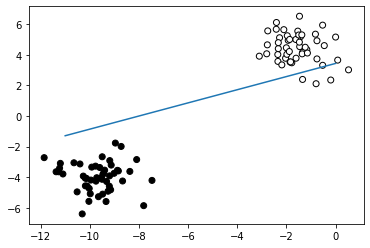

In [40]:
draw_05_line(z.weight[0,0],z.weight[0,1],z.bias[0])